## 셀프 주유소는 정말 저렴할까
### 4.1 Selenium 사용하기

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('../webdriver/chromedriver.exe')
driver.get("http://www.yes24.com")

In [3]:
driver.save_screenshot('../img/001.png')

False

In [ ]:
driver.get("https://www.yes24.com/Templates/FTLogin.aspx")
elem_login = driver.find_element_by_id("SMemberID")
elem_login.clear()
elem_login.send_keys("ladder79")

elem_login = driver.find_element_by_id("SMemberPassword")
elem_login.clear()
elm_login.send_keys("") # 자신의 비번을 넣으세요

In [ ]:
xpath = '//*[@id="btnLogin"]'
driver.find_element_by_xpath.click()

In [ ]:
driver.get("https://www.yes24.com/Member/MyPage_reconfirmPW.aspx")

In [ ]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
raw_list = soup.selcet('#CLabMemId')
raw_list

In [ ]:
send_list = [raw_list[n].string for n in range(0,len())]
send_list

In [ ]:
driver.close()

### 4.2 서울시 구별 주유소 가격 정보 얻기

In [54]:
import time

driver = webdriver.Chrome('../webdriver/chromedriver')
driver.get("http://www.opinet.co.kr")
time.sleep(2)
driver.get("http://www.opinet.co.kr/searRgSelect.do")
time.sleep(2)

In [55]:
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys('서울')
time.sleep(2)

In [56]:
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [57]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [58]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [59]:
xpath = '//*[@id="searRgSelect"]'
element_sel_gu = driver.find_element_by_xpath(xpath).click()

## tqdm 모듈 : 상태 진행바 생성
- jupyter Notebook 에서 상태 진행바를 쉽게 만들어준다.
- 퍼센트 현작업갯수/총작업갯수 [작업시간/남은시간 iteration당 작업초]
- pip install tqdm

In [62]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = '//*[@id="searRgSelect"]'
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(3)
    
    xpath = '//*[@id="glopopd_excel"]'
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(3)

In [66]:
driver.close()

### 4.5 구별 주유가격에 대한 데이터의 정리

In [67]:
import pandas as pd
from glob import glob

In [73]:
glob('../data/지역_위치별*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [74]:
stations_files = glob('../data/지역_위치별*.xls')
stations_files

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [75]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [76]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 41
Data columns (total 10 columns):
지역       506 non-null object
상호       506 non-null object
주소       506 non-null object
상표       506 non-null object
전화번호     506 non-null object
셀프여부     506 non-null object
고급휘발유    506 non-null object
휘발유      506 non-null object
경유       506 non-null object
실내등유     506 non-null object
dtypes: object(10)
memory usage: 43.5+ KB


In [77]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1516,1377,-
1,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1719,1519,1399,1150
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1519,1360,-
3,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-484-9323,N,-,1536,1387,1100
4,서울특별시,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1798,1538,1398,1150


In [78]:
station_raw.shape

(506, 10)

In [79]:
station = pd.DataFrame({
    'Oil_store':station_raw['상호'],
    '주소':station_raw['주소'],
    '가격':station_raw['휘발유'],
    '셀프':station_raw['셀프여부'],
    '상표':station_raw['상표']
})
station.head()

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1516,N,현대오일뱅크
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1519,N,GS칼텍스
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1519,Y,GS칼텍스
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1536,N,현대오일뱅크
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1538,N,GS칼텍스


In [81]:
station['구']=[eachAddress.split()[1] for eachAddress in station['주소']]
station.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1516,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1519,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1519,Y,GS칼텍스,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1536,N,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1538,N,GS칼텍스,강동구


In [82]:
station['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [84]:
station[station['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
11,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
12,망원동주유소,서울 마포구 월드컵로 119 (망원동),-,N,SK에너지,마포구
13,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
16,아이콘주유소,서울 성동구 고산자로 273 (도선동),-,N,S-OIL,성동구
22,KR누리(주) 종암주유소,서울 성북구 종암로 145 (종암동),-,N,SK에너지,성북구
25,현대오일뱅크(주)직영 양천셀프주유소,서울 양천구 목동로 17 (신정동),-,Y,현대오일뱅크,양천구
17,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
41,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [85]:
station = station[station['가격'] != '-' ]
station.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1516,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1519,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1519,Y,GS칼텍스,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1536,N,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1538,N,GS칼텍스,강동구


In [87]:
station['가격'] = [float(value) for value in station['가격']]
# station['가격'] = station['가격'].astype(float)

In [88]:
station.reset_index(inplace=True)
del station['index']

In [89]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
Oil_store    497 non-null object
주소           497 non-null object
가격           497 non-null float64
셀프           497 non-null object
상표           497 non-null object
구            497 non-null object
dtypes: float64(1), object(5)
memory usage: 23.4+ KB


In [90]:
station.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1516.0,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1519.0,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1519.0,Y,GS칼텍스,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1536.0,N,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1538.0,N,GS칼텍스,강동구


### 4.4 셀프주유소는 정말 저렴한지 boxplot으로 확인하기

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('UnKnown system... sorry..')

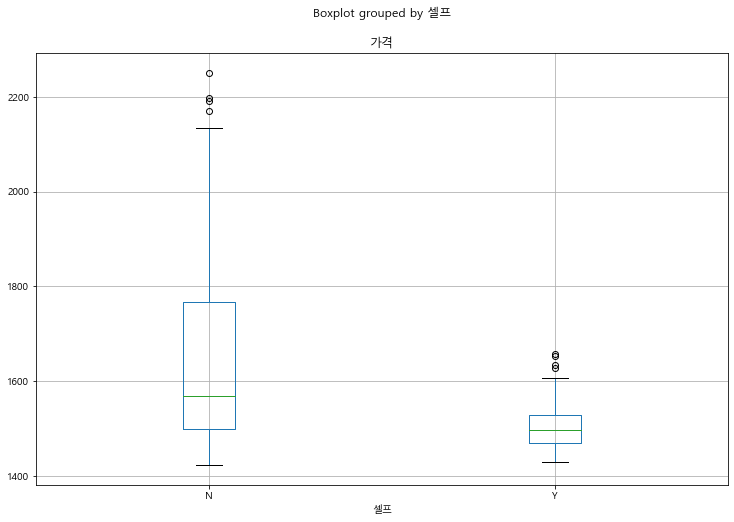

In [106]:
station.boxplot(column='가격', by='셀프', figsize=(12,8));
plt.show()

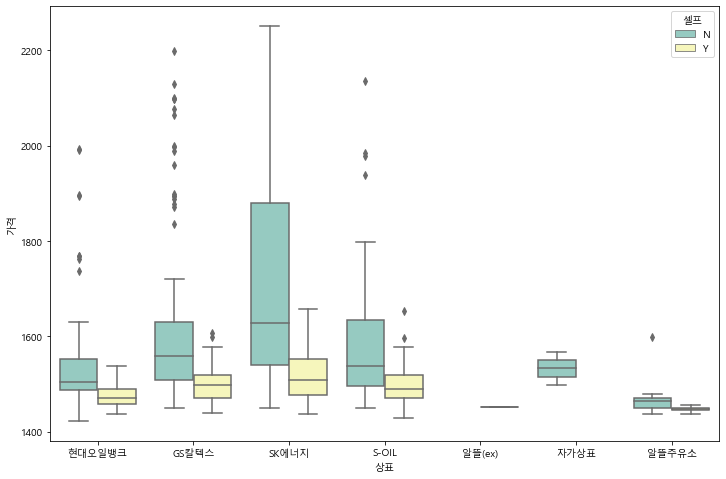

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='가격',hue='셀프',data=station, palette='Set3')
plt.show()

In [119]:
len((station['상표']=='알뜰주유소') & (station['셀프'] == 'Y'))

497

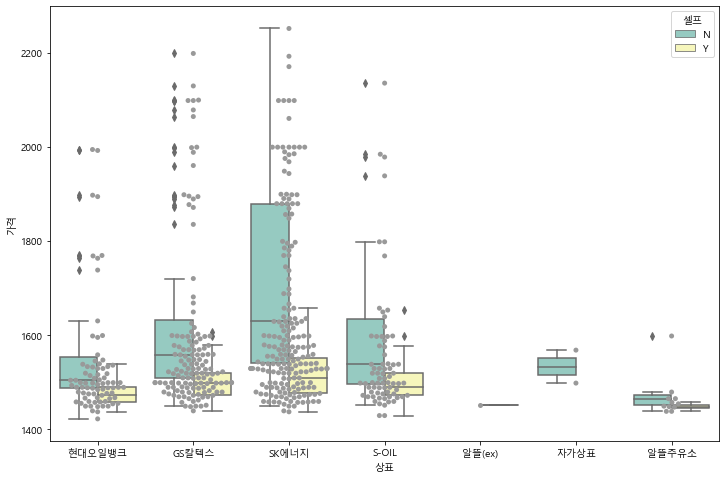

In [110]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='가격',hue='셀프',data=station, palette='Set3')
sns.swarmplot(x='상표',y='가격',data=station,color='.6')
plt.show()

### 4.5 서울시 구별 주유 가격 확인하기

In [127]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category=FutureWarning)

In [129]:
station.sort_values(by='가격', ascending=False).head()

,Oil_store,주소,가격,셀프,상표,구
303,서남주유소,서울 중구 통일로 30,2251.0,N,SK에너지,중구
302,SC(주) 역전주유소,서울 중구 퇴계로 15,2198.0,N,GS칼텍스,중구
301,장충주유소,서울 중구 장충단로 202 (장충동1가),2192.0,N,SK에너지,중구
496,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구
148,삼선주유소,서울 성북구 창경궁로 324,2135.0,N,S-OIL,성북구


In [126]:
import numpy as np

gu_data = pd.pivot_table(station, index=["구"], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1737.500000
강동구,1583.875000
강북구,1469.307692
강서구,1509.470588
관악구,1542.375000


In [133]:
geo_path = '../data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str, data= gu_data, columns=[gu_data.index, '가격'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on = 'feature.properties.SIG_KOR_NM')
map

### 4.6 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [134]:
oil_price_top10 = station.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
303,서남주유소,서울 중구 통일로 30,2251.0,N,SK에너지,중구
302,SC(주) 역전주유소,서울 중구 퇴계로 15,2198.0,N,GS칼텍스,중구
301,장충주유소,서울 중구 장충단로 202 (장충동1가),2192.0,N,SK에너지,중구
496,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구
148,삼선주유소,서울 성북구 창경궁로 324,2135.0,N,S-OIL,성북구
300,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2129.0,N,GS칼텍스,중구
299,필동주유소,서울특별시 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구
291,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구
265,에너비스,서울 용산구 한남대로 82 (한남동),2098.0,N,SK에너지,용산구
290,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2098.0,N,SK에너지,종로구


In [135]:
oil_price_bottom10 = station.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10 

,Oil_store,주소,가격,셀프,상표,구
238,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1422.0,N,현대오일뱅크,강북구
239,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1429.0,Y,S-OIL,강북구
181,현대주유소,서울 양천구 남부순환로 372 (신월동),1429.0,Y,S-OIL,양천구
266,타이거주유소,서울 은평구 수색로 188 (증산동),1437.0,Y,SK에너지,은평구
267,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1437.0,Y,현대오일뱅크,은평구
320,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1438.0,Y,알뜰주유소,강서구
321,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1438.0,N,알뜰주유소,강서구
182,개나리(셀프주유소),서울 양천구 남부순환로 442 (신월동),1439.0,Y,SK에너지,양천구
183,지에스칼텍스㈜ 서호주유소,서울 양천구 남부순환로 317,1439.0,Y,GS칼텍스,양천구
184,형산석유(주)원주유소,서울 양천구 남부순환로 408,1439.0,N,현대오일뱅크,양천구


In [136]:
gmap_key = "" # 구글 지도 API키 받아서 넣기
gmaps = googlemaps.Client(key=gmap_key)

In [137]:
from tqdm import tqdm_notebook

lat=[]
lng=[]

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n].split('(')[0])
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0]get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is non!")

oil_price_top10['lat']=lat
oil_price_top10['lng']=lng
oil_price_top10

SyntaxError: unexpected EOF while parsing (<ipython-input-137-e77ee6f91bd1>, line 8)

In [ ]:
from tqdm import tqdm_notebook

lat=[]
lng=[]

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n].split('(')[0])
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0]get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is non!")

oil_price_bottom10['lat']=lat
oil_price_bottom10['lng']=lng
oil_price_bottom10

In [ ]:
map = folium.Map(location=[37.5202,126.975],zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarket([oil_price_top10['lat'][n],oil_price_top10['lng'][n]],
                           radius=15,color='#CD3181', fill_color='#CD3181').add_to(map)

    for n in oil_price_bottom10.index:
        if pd.notnull([oil_price_bottom10['lat'][n],
                     oil_price_bottom10['lng'][n]],
                     radius=15, color='#3186cc'm
                     fill_color='#3186cc').add_to(map)

    map        